In [1]:
# Import libraries here needed to run this notebook
import os
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import elevation
import richdem as rd


import seaborn as sns
import earthpy as et
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy.plot as ep
import rasterio


from shapely.geometry import mapping


In [2]:
# Designate working directory path as object.
mypath = os.path.join(et.io.HOME, 'earth-analytics',
                      'post-wildfire-vegetation-change','data')

dtm_test_path = os.path.join(mypath,'NEON_lidar-elev',
                        'NEON.D07.GRSM.DP3.30024.001.2018-05.basic.20220428T075908Z.RELEASE-2022',
                        'NEON_D07_GRSM_DP3_274000_3951000_DTM.tif')

dtm_test = rxr.open_rasterio(dtm_test_path, masked=True).squeeze()                  
dtm_test

<xarray.DataArray (y: 1000, x: 1000)>
[1000000 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 2.74e+05 2.74e+05 2.74e+05 ... 2.75e+05 2.75e+05
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.951e+06 3.951e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

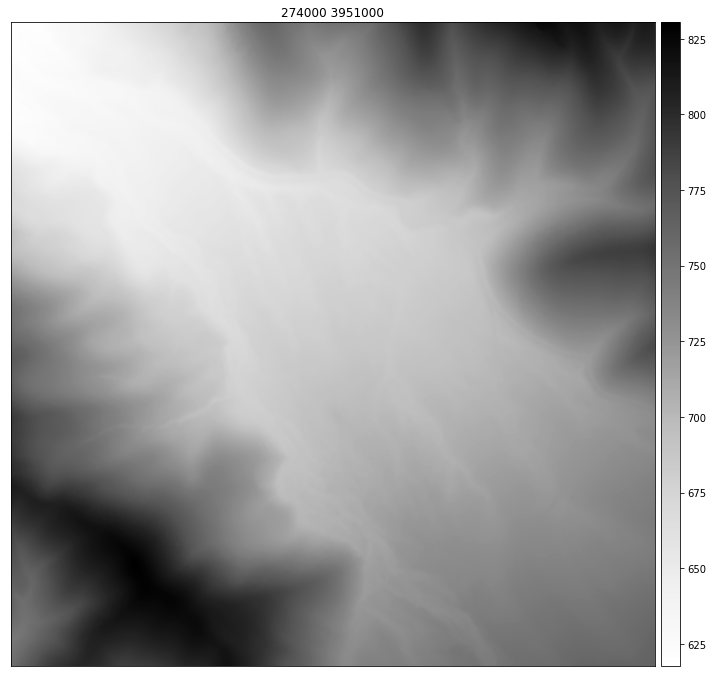

In [3]:
ep.plot_bands(dtm_test,
              title="274000 3951000",
              cmap="Greys")

plt.show()

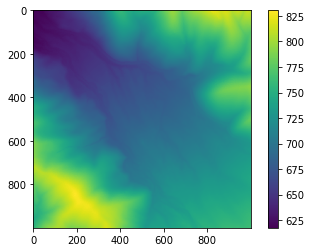

In [5]:
plt.imshow(dtm_test, interpolation='none')
plt.colorbar()
plt.show()

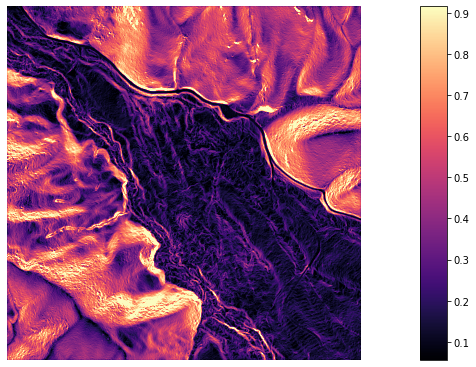

In [7]:
rich_dem = rd.LoadGDAL(dtm_test_path)
slope = rd.TerrainAttribute(rich_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

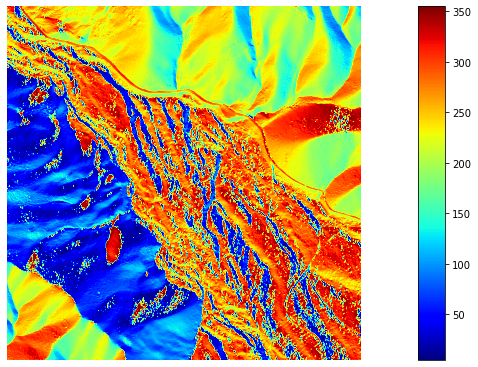

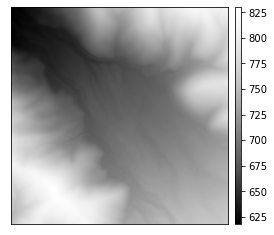

In [12]:
aspect = rd.TerrainAttribute(rich_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
fig, ax = plt.subplots()

ep.plot_bands(rich_dem,
              ax=ax,)

plt.show()
